In [2]:
import Data
from tqdm import tqdm
import os
%matplotlib inline
# from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import torch
import numpy as np
import albumentations as A
import torchvision.transforms as T
from PIL import Image
from glob import glob
os.getcwd()

dataroot = '/opt/ml/input/purified'

  0%|          | 0/19623 [00:00<?, ?it/s]


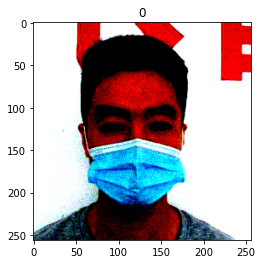

In [6]:
mask = Data.NormalDataset(isTrain=True)
# gend = data.ProjectedDataset(name='gender', isTrain=True)
# age  = data.ProjectedDataset(name='age', isTrain=True)

# mask_test = data.ProjectedDataset(name='mask', isTrain=False)
# gend_test = data.ProjectedDataset(name='gender', isTrain=False)
# age_test = data.ProjectedDataset(name='age', isTrain=False)

fig = plt.figure()

n_epochs = 1
axs = [fig.add_subplot(1, n_epochs, i+1) for i in range(n_epochs)]
imgs = [] 

tosee = 0
for epoch in range(n_epochs):
    for idx, (img, label) in enumerate(tqdm(mask)):
        if label==tosee:
            axs[epoch].imshow(np.array(img, dtype=np.float64).transpose((1,2,0)) )
            axs[epoch].set_title(label)
            break

plt.show()

In [7]:
i = 0

255


/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


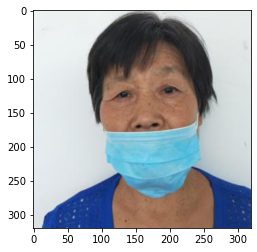

In [8]:
transforms = A.Compose([
    A.CenterCrop(350,350),
    A.Cutout(num_holes=3, max_h_size=40, max_w_size=40),
    A.Cutout(num_holes=1, max_h_size=100, max_w_size=70),
    A.RandomBrightnessContrast(),
    A.ElasticTransform(),
    A.GaussNoise(),
    A.GridDistortion(),
    A.HorizontalFlip(),
    A.Normalize(),
    # A.Normalize(mean=(0.56019358, 0.52410121, 0.501457),
    #     std=(0.23318603, 0.24300033, 0.24567522))
])

impath = os.path.join(dataroot, 'train')
all_imgs = glob(f'{impath}/**/*.*')
i += 1
X = np.array(Image.open(all_imgs[i]), dtype=np.uint8)
print(X.max())
# X = transforms(image=X)
X = A.CenterCrop(320,320)(image=X)['image']
# X = transforms(image=X)
plt.imshow(X)
plt.show()

In [9]:
impath = os.path.join(dataroot, 'train')
all_imgs = glob(f'{impath}/*.*')
all_imgs_sup = glob(f'{impath}/**/*.*')

100%|██████████| 18/18 [00:00<00:00, 388.06it/s]


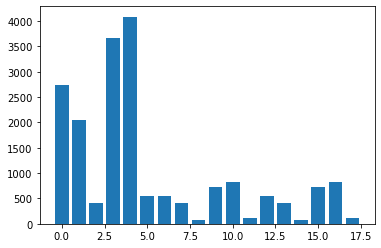

18900
[2745, 2050, 415, 3660, 4085, 545, 549, 410, 83, 732, 817, 109, 549, 410, 83, 732, 817, 109]


In [10]:
base_plot = []
for cls in tqdm(range(18)):
    base_plot.append(len(glob(f'{impath}/{cls}/*.*')))

idx = [x for x in range(18)]
plt.bar(idx, base_plot)
plt.show()
print(sum(base_plot))
print(base_plot)

In [11]:
cls_dist = []
expand_ratio = 0.5
train_root = os.path.join(dataroot, 'train')
for cls in range(18):
    cls_dist.append(len(glob(f'{train_root}/{cls}/**/*.*', recursive=True)))

cls_dist = np.array(cls_dist)
# supl_num = (np.max(cls_dist) - cls_dist) * expand_ratio
# supl_num = supl_num.astype(np.int)
supl_ratio = np.log( (cls_dist / np.max(cls_dist)) * 1e5)
supl_ratio = supl_ratio / np.max(supl_ratio)
threshold = np.zeros(shape=(18,))
# threshold = np.zeros(shape=supl_num.shape)
threshold.fill(1500)

supl_num = (expand_ratio * (np.max(cls_dist) * supl_ratio * (cls_dist < threshold))).astype(np.int)

for i in range(18):
    print(f'{supl_ratio[i]:.3f}', end=' ')
print()
for i in range(18):
    print(f'{supl_num[i]: <5d}', end=' ')

0.965 0.940 0.805 0.990 1.000 0.852 0.840 0.829 0.682 0.851 0.860 0.693 0.835 0.828 0.662 0.851 0.860 0.685 
0     0     1643  0     0     1740  1716  1692  1392  1737  1756  1415  1704  1692  1351  1737  1756  1399  

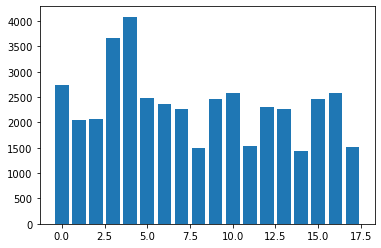

42353


In [14]:
plt.bar(idx, cls_dist+supl_num)
plt.show()
print(sum(cls_dist+supl_num))

<ipython-input-213-68eb99eb4ed6>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.bar(idx, 1/supl_num)


<BarContainer object of 18 artists>

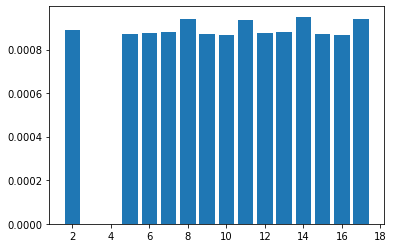

In [213]:
plt.bar(idx, 1/supl_num)